In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
import scipy.stats
from sklearn.metrics import explained_variance_score

In [2]:
true_mean = np.zeros((2,20,1)) #
true = np.zeros((2,20,50000)) #
true[0] = np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true[1] = np.load("/scratch/yjk27/CA1_OOP/data/vdata_T10_Ne2000_gA0.6_tauA1_NbgClust4_gN0.8_Ni200_gG0.1_gB0.1_Nafactor1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true_mean[0] = np.mean(np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true_mean[1] = np.mean(np.load("/scratch/yjk27/CA1_OOP/data/vdata_T10_Ne2000_gA0.6_tauA1_NbgClust4_gN0.8_Ni200_gG0.1_gB0.1_Nafactor1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))

na_true = np.zeros((2,20,50000)) #
na_true[0] = np.load("/scratch/yjk27/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-50000*20:].reshape(20,50000)
na_true[1] = np.load("/scratch/yjk27/CA1_OOP/data/V_diff_stimseed1.npy")[-50000*20:].reshape(20,50000)
 
nona_true_mean = np.zeros((2,20,1)) #
nona_true = np.zeros((2,20,50000)) #
nona_true_mean[0] = np.mean(np.load("/scratch/yjk27/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
nona_true[0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
nona_true_mean[1] = np.mean(np.load("/scratch/yjk27/CA1_OOP/data/vdata_T10_Ne2000_gA0.6_tauA1_NbgClust4_gN0.8_Ni200_gG0.1_gB0.1_Nafactor0_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
nona_true[1] = np.load("/scratch/yjk27/CA1_OOP/data/vdata_T10_Ne2000_gA0.6_tauA1_NbgClust4_gN0.8_Ni200_gG0.1_gB0.1_Nafactor0_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

glm1 = np.zeros((2,20,50000)) #
glm2 = np.zeros((2,20,50000)) #
gru = np.zeros((2,20,50000)) #
glm1[0] = np.load("/scratch/yjk27/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"]
glm2[0] = np.load("/scratch/yjk27/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"]
gru[0] = np.load("/scratch/yjk27/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"]
glm1[1] = np.load("/scratch/yjk27/CA1_OOP/whole/glm_s5_h1_output.npz")["test"]
glm2[1] = np.load("/scratch/yjk27/CA1_OOP/whole/glm_s5_h2_output.npz")["test"]
gru[1] = np.load("/scratch/yjk27/CA1_OOP/whole/gru_s5_h20_output.npz")["test"]

na_glm = np.zeros((2,20,50000)) #
na_gru = np.zeros((2,20,50000)) #
na_gru[0] = np.load("/scratch/yjk27/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
na_glm[0] = np.load("/scratch/yjk27/CA1_clust4-60/global/glm_s1_h1_output.npz")["test"]
na_gru[1] = np.load("/scratch/yjk27/CA1_OOP/na/gru_s5_h20_output.npz")["test"]
na_glm[1] = np.load("/scratch/yjk27/CA1_OOP/na/glm_s1_h1_output.npz")["test"]

nona_glm = np.zeros((2,20,50000)) #
nona_gru = np.zeros((2,20,50000)) #
nona_gru[0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
nona_glm[0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/global/gru_s1_h20_output.npz")["test"]
nona_gru[1] = np.load("/scratch/yjk27/CA1_OOP/nona/gru_s5_h20_output.npz")["test"]
nona_glm[1] = np.load("/scratch/yjk27/CA1_OOP/nona/glm_s1_h1_output.npz")["test"]

na_comp_var_exp_raw = np.zeros((2,3,20,50000))
na_comp_var_exp_raw[0,0] = np.load("/scratch/yjk27/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
na_comp_var_exp_raw[0,1] = np.load("/scratch/yjk27/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
na_comp_var_exp_raw[0,2] = np.load("/scratch/yjk27/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
na_comp_var_exp_raw[1,0] = np.load("/scratch/yjk27/CA1_OOP/na/glm_s5_h1_output.npz")["test"]
na_comp_var_exp_raw[1,1] = np.load("/scratch/yjk27/CA1_OOP/na/glm_s5_h2_output.npz")["test"]
na_comp_var_exp_raw[1,2] = np.load("/scratch/yjk27/CA1_OOP/na/gru_s5_h20_output.npz")["test"]

nona_comp_var_exp_raw = np.zeros((2,3,20,50000))
nona_comp_var_exp_raw[0,0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"]
nona_comp_var_exp_raw[0,1] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"]
nona_comp_var_exp_raw[0,2] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
nona_comp_var_exp_raw[1,0] = np.load("/scratch/yjk27/CA1_OOP/nona/glm_s5_h1_output.npz")["test"]
nona_comp_var_exp_raw[1,1] = np.load("/scratch/yjk27/CA1_OOP/nona/glm_s5_h2_output.npz")["test"]
nona_comp_var_exp_raw[1,2] = np.load("/scratch/yjk27/CA1_OOP/nona/gru_s5_h20_output.npz")["test"]

glm1 += true_mean
glm2 += true_mean
gru += true_mean

nona_glm += nona_true_mean
nona_gru += nona_true_mean
soma_errors = true - gru

In [3]:
soma_var_exp = np.zeros((2,3,20))
na_var_exp = np.zeros((2,2,20))
nona_var_exp = np.zeros((2,2,20))
na_comp_var_exp = np.zeros((2,3,20))
nona_comp_var_exp = np.zeros((2,3,20))

for x in range(2):
    for i in range(20):
        soma_var_exp[x,0,i] = explained_variance_score(true[x,i], glm1[x,i])
        soma_var_exp[x,1,i] = explained_variance_score(true[x,i], glm2[x,i])
        soma_var_exp[x,2,i] = explained_variance_score(true[x,i], gru[x,i])
        
        na_var_exp[x,0,i] = explained_variance_score(na_true[x,i], na_glm[x,i])
        na_var_exp[x,1,i] = explained_variance_score(na_true[x,i], na_gru[x,i])
        
        na_comp_var_exp[x,0,i] = explained_variance_score(na_true[x,i], na_comp_var_exp_raw[x,0,i])
        na_comp_var_exp[x,1,i] = explained_variance_score(na_true[x,i], na_comp_var_exp_raw[x,1,i])
        na_comp_var_exp[x,2,i] = explained_variance_score(na_true[x,i], na_comp_var_exp_raw[x,2,i])
        
        nona_var_exp[x,0,i] = explained_variance_score(nona_true[x,i], nona_glm[x,i])
        nona_var_exp[x,1,i] = explained_variance_score(nona_true[x,i], nona_gru[x,i])
        
        nona_comp_var_exp[x,0,i] = explained_variance_score(nona_true[x,i], nona_comp_var_exp_raw[x,0,i])
        nona_comp_var_exp[x,1,i] = explained_variance_score(nona_true[x,i], nona_comp_var_exp_raw[x,1,i])
        nona_comp_var_exp[x,2,i] = explained_variance_score(nona_true[x,i], nona_comp_var_exp_raw[x,2,i])
        
bin_no = 40
error_diff = np.zeros((2,bin_no,bin_no))
diff_bins = np.zeros((2,bin_no+1))
error_bins = np.zeros((2,bin_no+1))
for i in range(2):        
    error_diff_, diff_bins_, error_bins_ = np.histogram2d(na_true[i].flatten(), soma_errors[i].flatten(), bins=bin_no)
    error_diff[i] = error_diff_
    diff_bins[i] = diff_bins_
    error_bins[i] = error_bins_

<ipython-input-12-d33f2c6c3708>:175: RuntimeWarning: divide by zero encountered in log10
  img = ax2.imshow(np.flipud(np.log10(error_diff[1]).T), extent=[diff_bins[1,0], diff_bins[1,-1], error_bins[1,0], error_bins[1,-1]], cmap="jet")
<ipython-input-12-d33f2c6c3708>:192: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


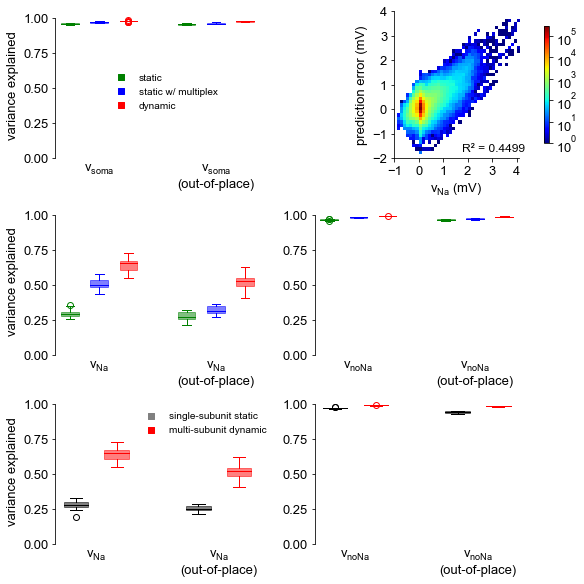

In [12]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (8,8))
gs = fig.add_gridspec(3,2, wspace=0.5, hspace=0.5)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])



colors = ["green", "blue", "red"] * 2
cap_colors = ["green", "green", "blue", "blue", "red", "red"] * 2

bp = ax1.boxplot(soma_var_exp.reshape((-1,20)).T,
                 positions = [1,2,3,5,6,7], widths = 0.6, patch_artist=True)
for i in range(soma_var_exp.reshape((-1,20)).shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(soma_var_exp.reshape((-1,20)).shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax1.set_ylim(0,1)
ax1.set_xticks([2,6])
ax1.tick_params(axis="x", length=0)
ax1.set_xticklabels(["$\mathregular{v_{soma}}$", "$\mathregular{v_{soma}}$\n(out-of-place)"])
ax1.set_ylabel("variance explained")
ax1.margins(x=0.005, y=0.005)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
#ax1.set_title("$\mathregular{v_{soma}}$", fontsize=13)
ax1.set_ylim(0,1.05)
ax1.set_yticks(np.arange(0,1.01,0.25))
ax1.spines["left"].set_bounds((0,1))

hR = ax1.scatter(1,1,c='red', marker="s")
hB = ax1.scatter(1,1,c='blue', marker="s")
hG = ax1.scatter(1,1,c='green', marker="s")
ax1.legend((hG, hB, hR),('static', 'static w/ multiplex', 'dynamic'), frameon=False, loc=(0.25,0.3), fontsize=10)
hG.set_visible(False)
hR.set_visible(False)
hB.set_visible(False)

############ COMP VAR EXP ######

colors = ["green", "blue", "red"] * 2
cap_colors = ["green", "green", "blue", "blue", "red", "red"] * 2

bp = ax3.boxplot(na_comp_var_exp.reshape(-1,20).T, positions = [1,2,3,5,6,7],
                 widths = 0.6, patch_artist=True)
for i in range(6):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(6*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax3.set_ylim(0,1)
ax3.set_xticks([2,6])
ax3.tick_params(axis="x", length=0)
ax3.set_xticklabels(["$\mathregular{v_{Na}}$", "$\mathregular{v_{Na}}$\n(out-of-place)"])
ax3.set_ylabel("variance explained")
ax3.margins(x=0.005, y=0.005)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
#ax3.set_title("$\mathregular{v_{Na}}$", fontsize=13)
ax3.set_ylim(0,1.05)
ax3.set_yticks(np.arange(0,1.01,0.25))
ax3.spines["left"].set_bounds((0,1))


bp = ax4.boxplot(nona_comp_var_exp.reshape(-1,20).T, positions = [1,2,3,5,6,7],
                 widths = 0.6, patch_artist=True)
for i in range(6):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(6*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax4.set_ylim(0,1)
ax4.set_xticks([2,6])
ax4.tick_params(axis="x", length=0)
ax4.set_xticklabels(["$\mathregular{v_{noNa}}$", "$\mathregular{v_{noNa}}$\n(out-of-place)"])
ax4.margins(x=0.005, y=0.005)
ax4.spines["right"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
#ax6.set_title("$\mathregular{v_{noNa}}$", fontsize=13)
ax4.set_ylim(0,1.05)
ax4.set_yticks(np.arange(0,1.01,0.25))
ax4.spines["left"].set_bounds((0,1))

######### MULT DYNAMIC vs SINGLE STATIC ####

colors = ["black", "red"] * 2
cap_colors = ["black", "black", "red", "red"] * 2

bp = ax5.boxplot(na_var_exp.reshape((-1,20)).T,
                 positions = [1,2,4,5], widths = 0.6, patch_artist=True)
for i in range(na_var_exp.reshape((-1,20)).shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(na_var_exp.reshape((-1,20)).shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax5.set_ylim(0,1)
ax5.set_xticks([1.5,4.5])
ax5.tick_params(axis="x", length=0)
ax5.set_xticklabels(["$\mathregular{v_{Na}}$", "$\mathregular{v_{Na}}$\n(out-of-place)"])
ax5.margins(x=0.005, y=0.005)
ax5.spines["right"].set_visible(False)
ax5.spines["top"].set_visible(False)
ax5.spines["bottom"].set_visible(False)
#ax3.set_title("$\mathregular{v_{Na}}$", fontsize=13)
ax5.set_ylabel("variance explained")
ax5.set_ylim(0,1.05)
ax5.set_yticks(np.arange(0,1.01,0.25))
ax5.spines["left"].set_bounds((0,1))

hR = ax5.scatter(1,1,c='red', marker="s")
hG = ax5.scatter(1,1,c='gray', marker="s")
ax5.legend((hG, hR),('single-subunit static', 'multi-subunit dynamic'), frameon=False, loc=(0.4,0.72),
          fontsize=10)
hG.set_visible(False)
hR.set_visible(False)

bp = ax6.boxplot(nona_var_exp.reshape((-1,20)).T, positions = [1,2,4,5], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp.reshape((-1,20)).shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp.reshape((-1,20)).shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax6.set_ylim(0,1)
ax6.set_xticks([1.5,4.5])
ax6.tick_params(axis="x", length=0)
ax6.set_xticklabels(["$\mathregular{v_{noNa}}$", "$\mathregular{v_{noNa}}$\n(out-of-place)"])
ax6.margins(x=0.005, y=0.005)
ax6.spines["right"].set_visible(False)
ax6.spines["top"].set_visible(False)
ax6.spines["bottom"].set_visible(False)
#ax6.set_title("$\mathregular{v_{noNa}}$", fontsize=13)
ax6.set_ylim(0,1.05)
ax6.set_yticks(np.arange(0,1.01,0.25))
ax6.spines["left"].set_bounds((0,1))

######### SCATTER PLOT SOMA ERROR ####

img = ax2.imshow(np.flipud(np.log10(error_diff[1]).T), extent=[diff_bins[1,0], diff_bins[1,-1], error_bins[1,0], error_bins[1,-1]], cmap="jet")
coeff = np.corrcoef(na_true[1].flatten(), soma_errors[1].flatten())[0][1]
ax2.set_xlabel("$\mathregular{v_{Na}}$ (mV)")
ax2.set_ylabel("prediction error (mV)")
ax2.set_xticks(np.arange(-1,4.01,1))
ax2.set_yticks(np.arange(-2,4.01,1))
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_aspect(1)
ax2.annotate("R² = "+str(np.round(coeff,4)), xy=(1.05,0.1),  xycoords='axes fraction',
                size=12, ha='right', va='top')
cbar = fig.colorbar(img, ax=[ax2], shrink=0.8, pad=0.025, fraction=0.01, ticks=[0,1,2,3,4,5,6])
cbar.ax.set_yticklabels(["$\mathregular{10^0}$","$\mathregular{10^1}$",
                         "$\mathregular{10^2}$","$\mathregular{10^3}$",
                         "$\mathregular{10^4}$","$\mathregular{10^5}$",
                        "$\mathregular{10^6}$"])

fig.tight_layout()
#plt.show()
#fig.savefig("/scratch/yjk27/dendrite/fig_oop/fig_oop_raw.pdf", bbox_inches="tight", transparent=True)